In [1]:
!pip install yfinance
!pip install yahoofinancials
!pip install fastai
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importing Basic Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import yfinance as yf
from yahoofinancials import YahooFinancials
%matplotlib inline
from fastai.tabular.all import add_datepart

##creating dataframe for stock and EDA

In [3]:
# stock for TATAMOTORS
stock = "TATAMOTORS.NS"

In [4]:
# accessing data
df = yf.download(stock, start='2010-01-01', end='2023-03-31', progress=False)
df_copy1 = df.copy()
df_copy1.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-23,416.000000,422.500000,416.000000,419.149994,419.149994,9817460
2023-03-24,419.000000,420.549988,414.799988,416.500000,416.500000,6877960
2023-03-27,416.000000,418.500000,410.250000,412.049988,412.049988,7433933
2023-03-28,414.149994,414.500000,400.450012,401.600006,401.600006,9553659
2023-03-29,401.600006,410.600006,401.600006,409.200012,409.200012,10478506


In [5]:
df_copy1.shape

(3270, 6)

In [6]:
df_copy1 = df_copy1.reset_index()

In [7]:
# dropping features as they are highly correalted with the closing price
df_copy1 = df_copy1.drop(['Open', 'High', 'Low', 'Adj Close' ], axis=1)
df_copy1.shape

(3270, 3)

In [8]:
# checking for repeated rows
dates = df_copy1['Date']
df_copy1[dates.isin(dates[dates.duplicated()])].sort_index()

,Date,Close,Volume


In [9]:
df_copy1 = df_copy1.drop_duplicates()

Text(0, 0.5, 'Price')

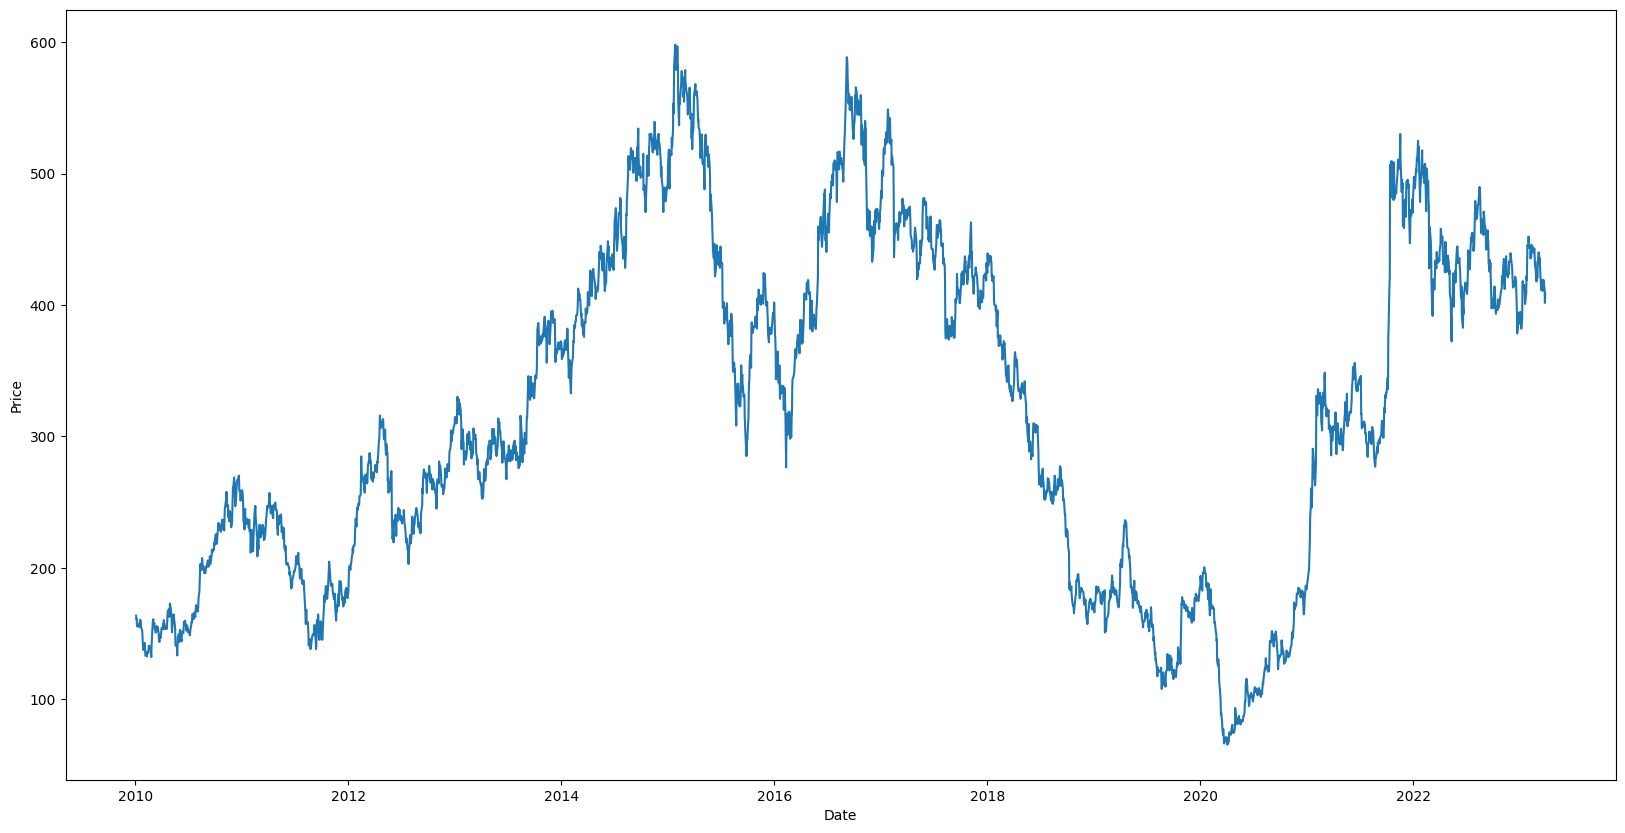

In [10]:
# # plotting price movement
df_copy1['Date'] = pd.to_datetime(df_copy1.Date, format='%Y-%m-%d')
df_copy1.set_index('Date', inplace=True)
 # plotting
pt.figure(figsize=(20,10))
pt.plot(df_copy1['Close'], label='Close Price movement')
pt.xlabel('Date')
pt.ylabel('Price')

##creating new features and understanding their nature

In [11]:
stock_price = df_copy1['Close'].to_frame()
stock_price['simple_MA_60'] = stock_price['Close'].rolling(60).mean()
stock_price['cumulative_MA'] = stock_price['Close'].expanding().mean()
stock_price['exponential_MA_60'] = stock_price['Close'].ewm(span=60).mean()
stock_price.dropna(inplace=True)

plots for Mean Averages for a roll back period for 60 days

Text(0, 0.5, 'Price')

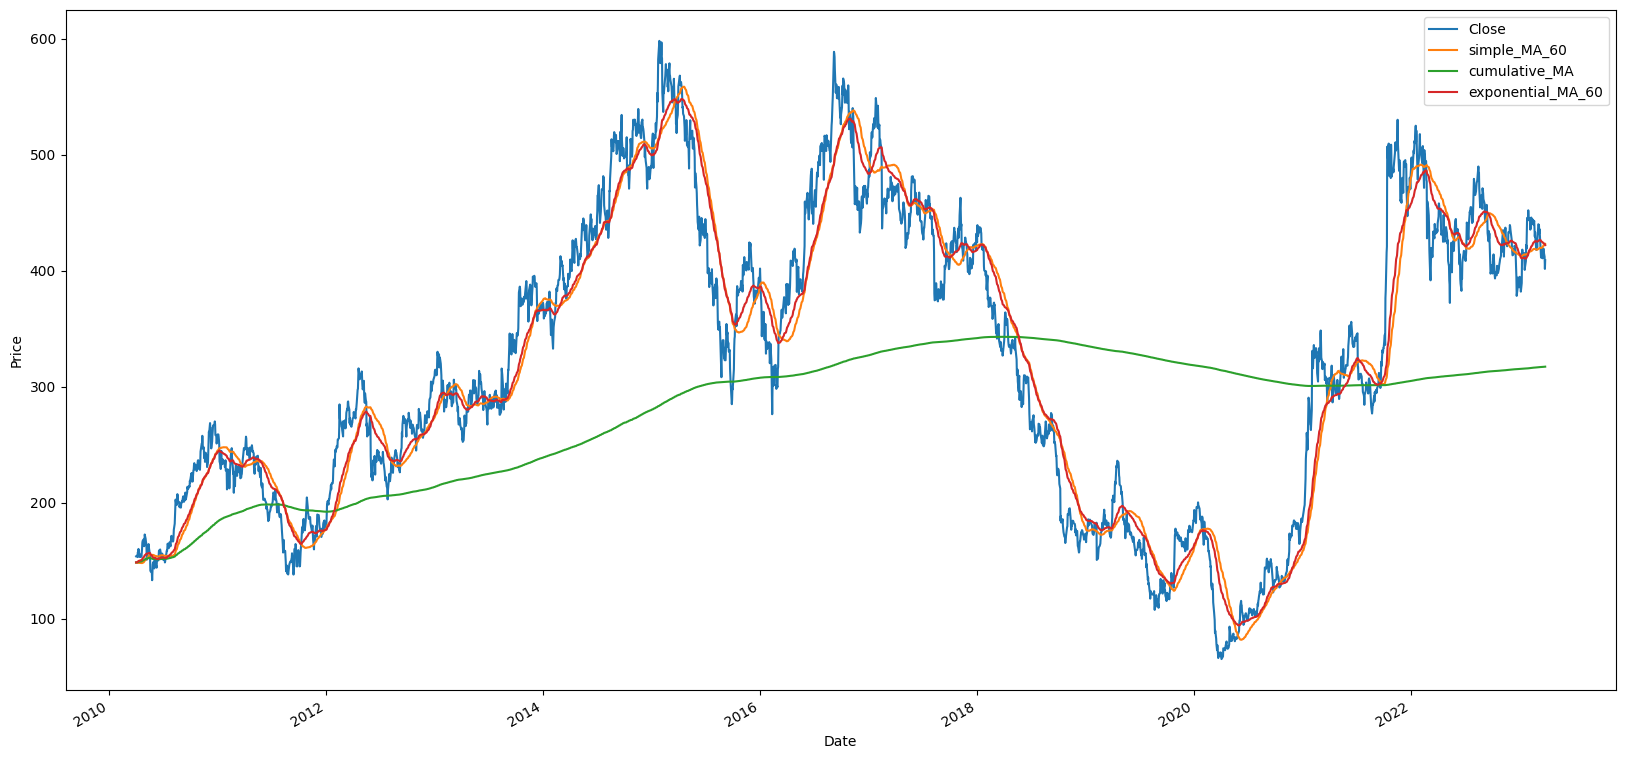

In [12]:
ax = stock_price[['Close', 'simple_MA_60','cumulative_MA','exponential_MA_60']].plot(label='MA comparison', figsize=(20,10))
ax.set_xlabel('Date')
ax.set_ylabel('Price')

the exponential MA provides major thresholds and reverting points while simple and cumulative MA traces the price

adding features- 

*   Moving Averages (MA)
*   Bollinger Bands (region enclosing +- std about MA)



In [13]:
df_copy1['simple_MA_60'] = df_copy1['Close'].rolling(60).mean()

In [14]:
df_copy1['BollingerBand_Up_60_1'] = df_copy1['Close'].rolling(60).mean() + df_copy1['Close'].rolling(60).std()
df_copy1['BollingerBand_Down_60_1'] = df_copy1['Close'].rolling(60).mean() - df_copy1['Close'].rolling(60).std()
df_copy1['BollingerBand_Up_60_2'] = df_copy1['Close'].rolling(60).mean() + 2*df_copy1['Close'].rolling(60).std()
df_copy1['BollingerBand_Down_60_2'] = df_copy1['Close'].rolling(60).mean() - 2*df_copy1['Close'].rolling(60).std()
df_copy1['BollingerBand_Up_20_2'] = df_copy1['Close'].rolling(20).mean() + 2*df_copy1['Close'].rolling(20).std()
df_copy1['BollingerBand_Down_20_2'] = df_copy1['Close'].rolling(20).mean() - 2*df_copy1['Close'].rolling(20).std()
df_copy1['BollingerBand_Up_20_1'] = df_copy1['Close'].rolling(20).mean() + df_copy1['Close'].rolling(20).std()
df_copy1['BollingerBand_Down_20_1'] = df_copy1['Close'].rolling(20).mean() - df_copy1['Close'].rolling(20).std()
df_copy1['BollingerBand_Up_10_1'] = df_copy1['Close'].rolling(10).mean() + df_copy1['Close'].rolling(10).std()
df_copy1['BollingerBand_Down_10_1'] = df_copy1['Close'].rolling(10).mean() - df_copy1['Close'].rolling(10).std()
df_copy1['BollingerBand_Up_10_2'] = df_copy1['Close'].rolling(10).mean() + 2*df_copy1['Close'].rolling(10).std()
df_copy1['BollingerBand_Down_10_2'] = df_copy1['Close'].rolling(10).mean() - 2*df_copy1['Close'].rolling(10).std()
df_copy1 = df_copy1.dropna()

Bollinger Bands Visualisation

Text(0, 0.5, 'Price')

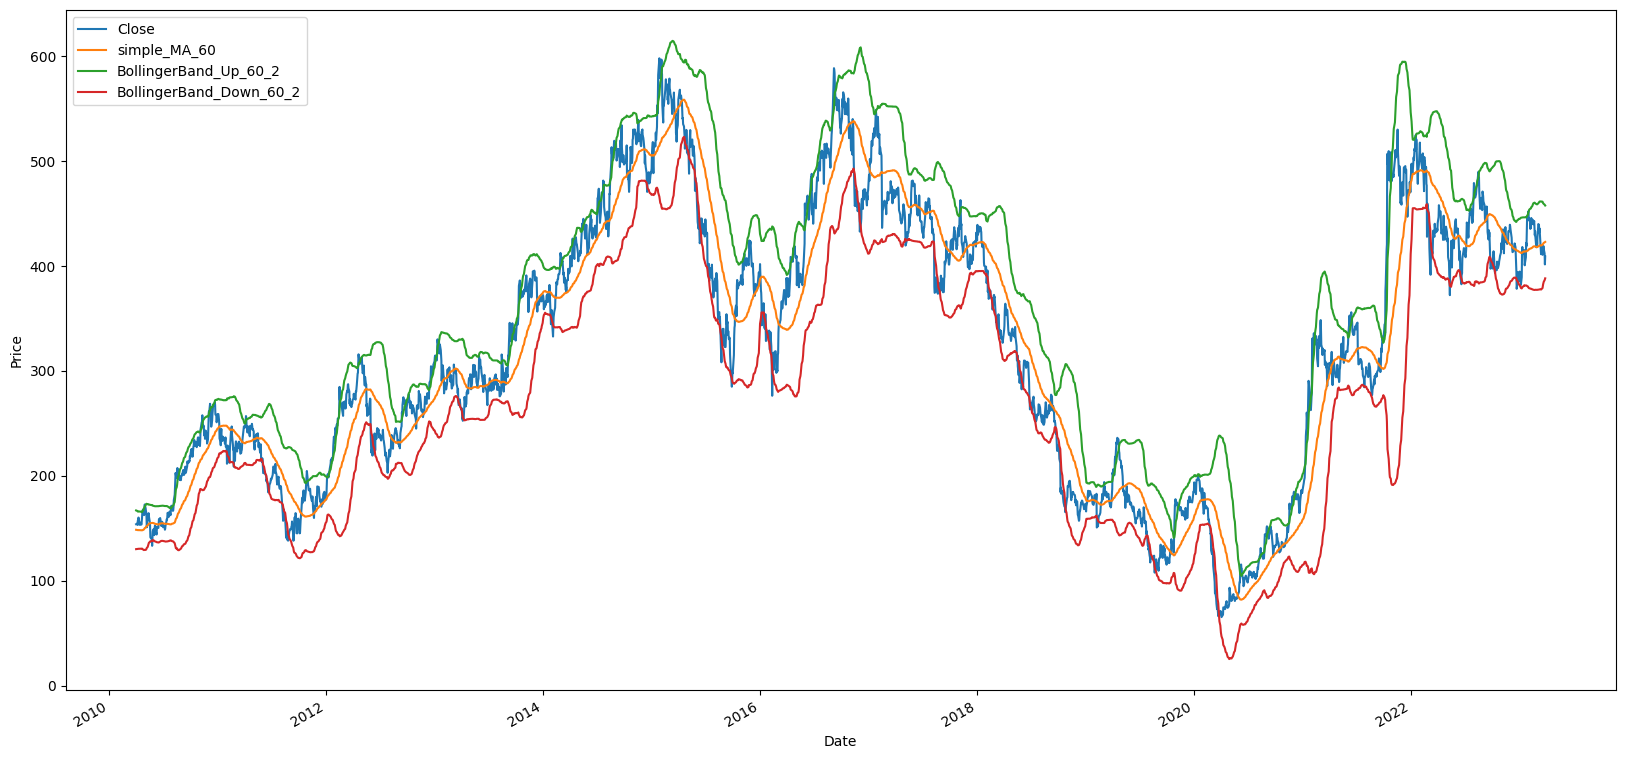

In [15]:
ax = df_copy1[['Close', 'simple_MA_60', 'BollingerBand_Up_60_2', 'BollingerBand_Down_60_2']].plot(label='BollingerBands', figsize=(20,10))
ax.set_xlabel('Date')
ax.set_ylabel('Price')

In [16]:
display(df_copy1)

,Close,Volume,simple_MA_60,BollingerBand_Up_60_1,BollingerBand_Down_60_1,BollingerBand_Up_60_2,BollingerBand_Down_60_2,BollingerBand_Up_20_2,BollingerBand_Down_20_2,BollingerBand_Up_20_1,BollingerBand_Down_20_1,BollingerBand_Up_10_1,BollingerBand_Down_10_1,BollingerBand_Up_10_2,BollingerBand_Down_10_2
Date,,,,,,,,,,,,,,,
2010-04-01,153.879486,20006815,148.548171,157.777211,139.319132,167.006251,130.090092,160.845636,143.825459,156.590592,148.080504,153.609738,145.988766,157.420224,142.178281
2010-04-05,154.631424,16111998,148.399763,157.453639,139.345888,166.507515,130.292012,159.624112,144.422679,155.823754,148.223037,153.663599,145.980416,157.505191,142.138825
2010-04-06,153.186920,11920952,148.274771,157.207099,139.342442,166.139428,130.410113,159.058165,144.590892,155.441347,148.207710,153.228500,146.039549,156.822975,142.445073
2010-04-07,157.381927,20079249,148.215572,157.074047,139.357098,165.932522,130.498623,158.958223,144.645323,155.379998,148.223548,154.686506,145.972622,159.043447,141.615680
2010-04-08,153.958633,11364522,148.191002,157.031145,139.350859,165.871288,130.510716,159.000666,144.642455,155.411113,148.232008,155.336704,146.855975,159.577068,142.615611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-23,419.149994,9817460,421.710000,440.699882,402.720118,459.689763,383.730237,441.448458,405.066548,432.352980,414.162025,425.233849,410.666151,432.517699,403.382301
2023-03-24,416.500000,6877960,422.130000,440.710157,403.549843,459.290314,384.969686,440.220742,404.624262,431.321622,413.523382,419.692863,412.337135,423.370727,408.659272
2023-03-27,412.049988,7433933,422.565834,440.579815,404.551852,458.593796,386.537871,439.826999,403.448004,430.732250,412.542753,418.070864,411.889133,421.161730,408.798268


## Analyzing different Models

In [17]:
df_copy2 = df.copy()
data = df_copy2['Close'].to_frame()
for lag in [20,40,60]:
    shift = lag
    shifted = df_copy2.shift(shift)
    shifted.columns = [str.format("%s_shifted_by_%d" % (column ,shift)) for column in shifted.columns]
    data = pd.concat((data,shifted),axis=1)

In [18]:
data = data.dropna()
display(data)

,Close,Open_shifted_by_20,High_shifted_by_20,Low_shifted_by_20,Close_shifted_by_20,Adj Close_shifted_by_20,Volume_shifted_by_20,Open_shifted_by_40,High_shifted_by_40,Low_shifted_by_40,Close_shifted_by_40,Adj Close_shifted_by_40,Volume_shifted_by_40,Open_shifted_by_60,High_shifted_by_60,Low_shifted_by_60,Close_shifted_by_60,Adj Close_shifted_by_60,Volume_shifted_by_60
Date,,,,,,,,,,,,,,,,,,,
2010-04-05,154.631424,160.063156,164.179016,158.133850,160.874466,150.648499,36989165.0,144.450623,146.429398,139.513580,140.384232,131.460724,21818956.0,156.303482,164.040497,156.184769,163.535919,153.140793,27906448.0
2010-04-06,153.186920,161.863846,161.863846,156.659668,157.164261,147.174149,27008963.0,141.482452,143.856995,140.364456,142.778564,133.702881,11665708.0,162.259598,167.147186,153.246277,160.686478,150.472473,23669317.0
2010-04-07,157.381927,158.302048,161.685760,156.946594,157.837036,147.804153,20424255.0,142.669724,143.461227,135.763794,136.456375,127.782555,14364089.0,162.200241,162.932388,159.311234,160.933823,150.704086,14990820.0
2010-04-08,153.958633,155.333893,155.333893,150.980576,153.562881,143.801682,57668210.0,132.577972,134.259933,130.233124,133.013306,124.558334,22246872.0,161.171280,161.923218,154.344498,155.432831,145.552765,22722030.0
2010-04-09,160.211563,153.948746,156.877335,153.444153,154.097153,144.302002,22771045.0,133.577255,136.119980,125.404907,133.221069,124.752899,17350173.0,156.323273,159.251862,155.343781,156.283707,146.349564,16495776.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-23,419.149994,435.299988,435.850006,428.250000,429.450012,429.450012,7209130.0,410.000000,424.000000,410.000000,422.149994,422.149994,30197475.0,390.000000,397.450012,388.500000,394.149994,394.149994,14372461.0
2023-03-24,416.500000,428.649994,436.450012,427.200012,433.200012,433.200012,9278920.0,423.750000,427.250000,417.700012,419.049988,419.049988,22975581.0,394.000000,395.899994,390.399994,391.299988,391.299988,8443917.0
2023-03-27,412.049988,435.399994,436.700012,427.000000,427.750000,427.750000,7895024.0,438.000000,453.399994,435.149994,445.600006,445.600006,63360467.0,389.000000,390.000000,383.049988,385.899994,385.899994,15627403.0


In [19]:
data = data.reset_index()
data.shape

(3210, 20)

In [20]:
date = data['Date'].to_frame()

add_datepart(data, 'Date')
data.drop('Elapsed', axis=1, inplace=True) 

In [21]:
display(data)

,Close,Open_shifted_by_20,High_shifted_by_20,Low_shifted_by_20,Close_shifted_by_20,Adj Close_shifted_by_20,Volume_shifted_by_20,Open_shifted_by_40,High_shifted_by_40,Low_shifted_by_40,...,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,154.631424,160.063156,164.179016,158.133850,160.874466,150.648499,36989165.0,144.450623,146.429398,139.513580,...,14,5,0,95,False,False,False,False,False,False
1,153.186920,161.863846,161.863846,156.659668,157.164261,147.174149,27008963.0,141.482452,143.856995,140.364456,...,14,6,1,96,False,False,False,False,False,False
2,157.381927,158.302048,161.685760,156.946594,157.837036,147.804153,20424255.0,142.669724,143.461227,135.763794,...,14,7,2,97,False,False,False,False,False,False
3,153.958633,155.333893,155.333893,150.980576,153.562881,143.801682,57668210.0,132.577972,134.259933,130.233124,...,14,8,3,98,False,False,False,False,False,False
4,160.211563,153.948746,156.877335,153.444153,154.097153,144.302002,22771045.0,133.577255,136.119980,125.404907,...,14,9,4,99,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3205,419.149994,435.299988,435.850006,428.250000,429.450012,429.450012,7209130.0,410.000000,424.000000,410.000000,...,12,23,3,82,False,False,False,False,False,False
3206,416.500000,428.649994,436.450012,427.200012,433.200012,433.200012,9278920.0,423.750000,427.250000,417.700012,...,12,24,4,83,False,False,False,False,False,False
3207,412.049988,435.399994,436.700012,427.000000,427.750000,427.750000,7895024.0,438.000000,453.399994,435.149994,...,13,27,0,86,False,False,False,False,False,False
3208,401.600006,427.750000,428.049988,413.049988,417.950012,417.950012,10438928.0,445.600006,450.000000,437.649994,...,13,28,1,87,False,False,False,False,False,False


In [22]:
# Introducing features for Date
data['mon_fri'] = 0
data.loc[data['Dayofweek'] == 0 , 'mon_fri'] = 1
data.loc[data['Dayofweek'] == 4 , 'mon_fri'] = 1
data

,Close,Open_shifted_by_20,High_shifted_by_20,Low_shifted_by_20,Close_shifted_by_20,Adj Close_shifted_by_20,Volume_shifted_by_20,Open_shifted_by_40,High_shifted_by_40,Low_shifted_by_40,...,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri
0,154.631424,160.063156,164.179016,158.133850,160.874466,150.648499,36989165.0,144.450623,146.429398,139.513580,...,5,0,95,False,False,False,False,False,False,1
1,153.186920,161.863846,161.863846,156.659668,157.164261,147.174149,27008963.0,141.482452,143.856995,140.364456,...,6,1,96,False,False,False,False,False,False,0
2,157.381927,158.302048,161.685760,156.946594,157.837036,147.804153,20424255.0,142.669724,143.461227,135.763794,...,7,2,97,False,False,False,False,False,False,0
3,153.958633,155.333893,155.333893,150.980576,153.562881,143.801682,57668210.0,132.577972,134.259933,130.233124,...,8,3,98,False,False,False,False,False,False,0
4,160.211563,153.948746,156.877335,153.444153,154.097153,144.302002,22771045.0,133.577255,136.119980,125.404907,...,9,4,99,False,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3205,419.149994,435.299988,435.850006,428.250000,429.450012,429.450012,7209130.0,410.000000,424.000000,410.000000,...,23,3,82,False,False,False,False,False,False,0
3206,416.500000,428.649994,436.450012,427.200012,433.200012,433.200012,9278920.0,423.750000,427.250000,417.700012,...,24,4,83,False,False,False,False,False,False,1
3207,412.049988,435.399994,436.700012,427.000000,427.750000,427.750000,7895024.0,438.000000,453.399994,435.149994,...,27,0,86,False,False,False,False,False,False,1
3208,401.600006,427.750000,428.049988,413.049988,417.950012,417.950012,10438928.0,445.600006,450.000000,437.649994,...,28,1,87,False,False,False,False,False,False,0


In [23]:
new_data = pd.concat((data,date),axis=1)
new_data
display(new_data)

,Close,Open_shifted_by_20,High_shifted_by_20,Low_shifted_by_20,Close_shifted_by_20,Adj Close_shifted_by_20,Volume_shifted_by_20,Open_shifted_by_40,High_shifted_by_40,Low_shifted_by_40,...,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri,Date
0,154.631424,160.063156,164.179016,158.133850,160.874466,150.648499,36989165.0,144.450623,146.429398,139.513580,...,0,95,False,False,False,False,False,False,1,2010-04-05
1,153.186920,161.863846,161.863846,156.659668,157.164261,147.174149,27008963.0,141.482452,143.856995,140.364456,...,1,96,False,False,False,False,False,False,0,2010-04-06
2,157.381927,158.302048,161.685760,156.946594,157.837036,147.804153,20424255.0,142.669724,143.461227,135.763794,...,2,97,False,False,False,False,False,False,0,2010-04-07
3,153.958633,155.333893,155.333893,150.980576,153.562881,143.801682,57668210.0,132.577972,134.259933,130.233124,...,3,98,False,False,False,False,False,False,0,2010-04-08
4,160.211563,153.948746,156.877335,153.444153,154.097153,144.302002,22771045.0,133.577255,136.119980,125.404907,...,4,99,False,False,False,False,False,False,1,2010-04-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3205,419.149994,435.299988,435.850006,428.250000,429.450012,429.450012,7209130.0,410.000000,424.000000,410.000000,...,3,82,False,False,False,False,False,False,0,2023-03-23
3206,416.500000,428.649994,436.450012,427.200012,433.200012,433.200012,9278920.0,423.750000,427.250000,417.700012,...,4,83,False,False,False,False,False,False,1,2023-03-24
3207,412.049988,435.399994,436.700012,427.000000,427.750000,427.750000,7895024.0,438.000000,453.399994,435.149994,...,0,86,False,False,False,False,False,False,1,2023-03-27
3208,401.600006,427.750000,428.049988,413.049988,417.950012,417.950012,10438928.0,445.600006,450.000000,437.649994,...,1,87,False,False,False,False,False,False,0,2023-03-28


In [24]:
train_size = int(0.7*new_data.shape[0])
test_size = int(0.3*new_data.shape[0])
print(train_size)
print(test_size)

2247
963


In [25]:
train_data = new_data[:train_size]
train_data = train_data.drop(['Date'], axis=1)
test_data = new_data[train_size:]
test_data = test_data.drop(['Date'], axis=1)
X_train = train_data.drop(['Close'], axis=1)
Y_train = train_data['Close']
X_test = test_data.drop(['Close'], axis = 1)
Y_test = test_data['Close']
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2247, 31)
(2247,)
(963, 31)
(963,)


##Linear Regression


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
model = LinearRegression()
model.fit(X_train,Y_train)
price_prediction = model.predict(X_test)
rms=np.sqrt(np.mean(np.power((np.array(Y_test)-np.array(price_prediction)),2)))
print(rms)
# print(type(price_prediction))
# print(price_prediction)

50.15831948417636


In [27]:
# Evaluation metrices RMSE and MAE
import math
print("Train data RMSE: ", math.sqrt(mean_squared_error(Y_train,model.predict(X_train))))
print("Train data MSE: ", mean_squared_error(Y_train,model.predict(X_train)))
print("Train data MAE: ", mean_absolute_error(Y_train,model.predict(X_train)))
print("Test data RMSE: ", math.sqrt(mean_squared_error(Y_test,price_prediction)))
print("Test data MSE: ", mean_squared_error(Y_test,price_prediction))
print("Test data MAE: ", mean_absolute_error(Y_test,price_prediction))
print("Train data explained variance regression score:", explained_variance_score(Y_train, model.predict(X_train)))
print("Test data explained variance regression score:", explained_variance_score(Y_test, price_prediction))
print("Train data R2 score:", r2_score(Y_train, model.predict(X_train)))
print("Test data R2 score:", r2_score(Y_test, price_prediction))
print("Train data MGD: ", mean_gamma_deviance(Y_train, model.predict(X_train)))
print("Test data MGD: ", mean_gamma_deviance(Y_test, price_prediction))
print("Train data MPD: ", mean_poisson_deviance(Y_train, model.predict(X_train)))
print("Test data MPD: ", mean_poisson_deviance(Y_test, price_prediction))

Train data RMSE:  31.087614489154543
Train data MSE:  966.4397746262915
Train data MAE:  24.5491642622653
Test data RMSE:  50.15831948417636
Test data MSE:  2515.8570134767056
Test data MAE:  35.82052820191614
Train data explained variance regression score: 0.9304556407853125
Test data explained variance regression score: 0.9009671304363455
Train data R2 score: 0.9304556407853125
Test data R2 score: 0.8735520229577994
Train data MGD:  0.009357444748657814
Test data MGD:  0.03891004093043794
Train data MPD:  2.8217388944933472
Test data MPD:  8.875625939840198


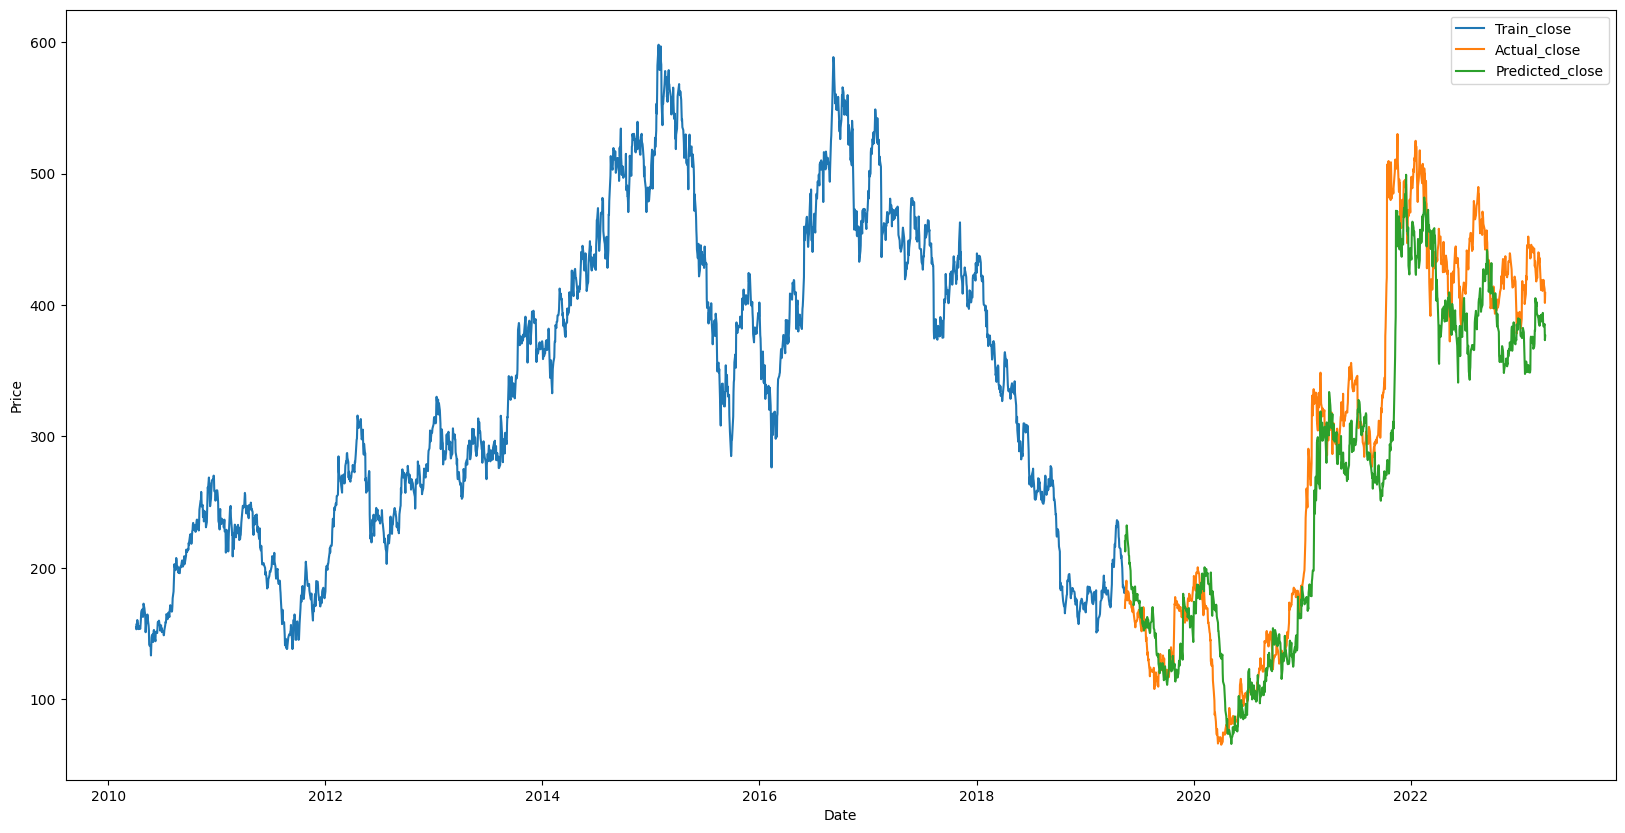

In [28]:
new_data.set_index('Date', inplace=True)
test_data['Predictions'] = 0
test_data['Predictions'] = price_prediction

test_data.index = new_data[train_size:].index
train_data.index = new_data[:train_size].index

pt.figure(figsize=(20,10))
pt.plot(train_data['Close'])
pt.plot(test_data[['Close', 'Predictions']])
pt.xlabel('Date')
pt.ylabel('Price')
pt.legend(['Train_close', 'Actual_close', 'Predicted_close'])

##KNN

In [29]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [30]:
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)
X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[4,5,6,7,8,9,10,11]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions,
model.fit(X_train,Y_train)
print(model.best_params_)
price_prediction_KNN = model.predict(X_test)

{'n_neighbors': 11}


In [31]:
rms_KNN=np.sqrt(np.mean(np.power((np.array(Y_test)-np.array(price_prediction_KNN)),2)))
rms

50.15831948417636

In [32]:
# Evaluation metrices RMSE and MAE
import math
print("Train data RMSE: ", math.sqrt(mean_squared_error(Y_train,model.predict(X_train))))
print("Train data MSE: ", mean_squared_error(Y_train,model.predict(X_train)))
print("Train data MAE: ", mean_absolute_error(Y_train,model.predict(X_train)))
print("Test data RMSE: ", math.sqrt(mean_squared_error(Y_test,price_prediction_KNN)))
print("Test data MSE: ", mean_squared_error(Y_test,price_prediction_KNN))
print("Test data MAE: ", mean_absolute_error(Y_test,price_prediction_KNN))
print("Train data explained variance regression score:", explained_variance_score(Y_train, model.predict(X_train)))
print("Test data explained variance regression score:", explained_variance_score(Y_test, price_prediction_KNN))
print("Train data R2 score:", r2_score(Y_train, model.predict(X_train)))
print("Test data R2 score:", r2_score(Y_test, price_prediction_KNN))
print("Train data MGD: ", mean_gamma_deviance(Y_train, model.predict(X_train)))
print("Test data MGD: ", mean_gamma_deviance(Y_test, price_prediction_KNN))
print("Train data MPD: ", mean_poisson_deviance(Y_train, model.predict(X_train)))
print("Test data MPD: ", mean_poisson_deviance(Y_test, price_prediction_KNN))

Train data RMSE:  23.605656132883
Train data MSE:  557.2270014639167
Train data MAE:  17.97085100814363
Test data RMSE:  77.97521532851982
Test data MSE:  6080.134205529033
Test data MAE:  68.88296447785596
Train data explained variance regression score: 0.9599024626097423
Test data explained variance regression score: 0.8826492689871909
Train data R2 score: 0.959902318001228
Test data R2 score: 0.6944100295382896
Train data MGD:  0.005835229586974146
Test data MGD:  0.10986626023532038
Train data MPD:  1.691448206907819
Test data MPD:  23.334108270534134


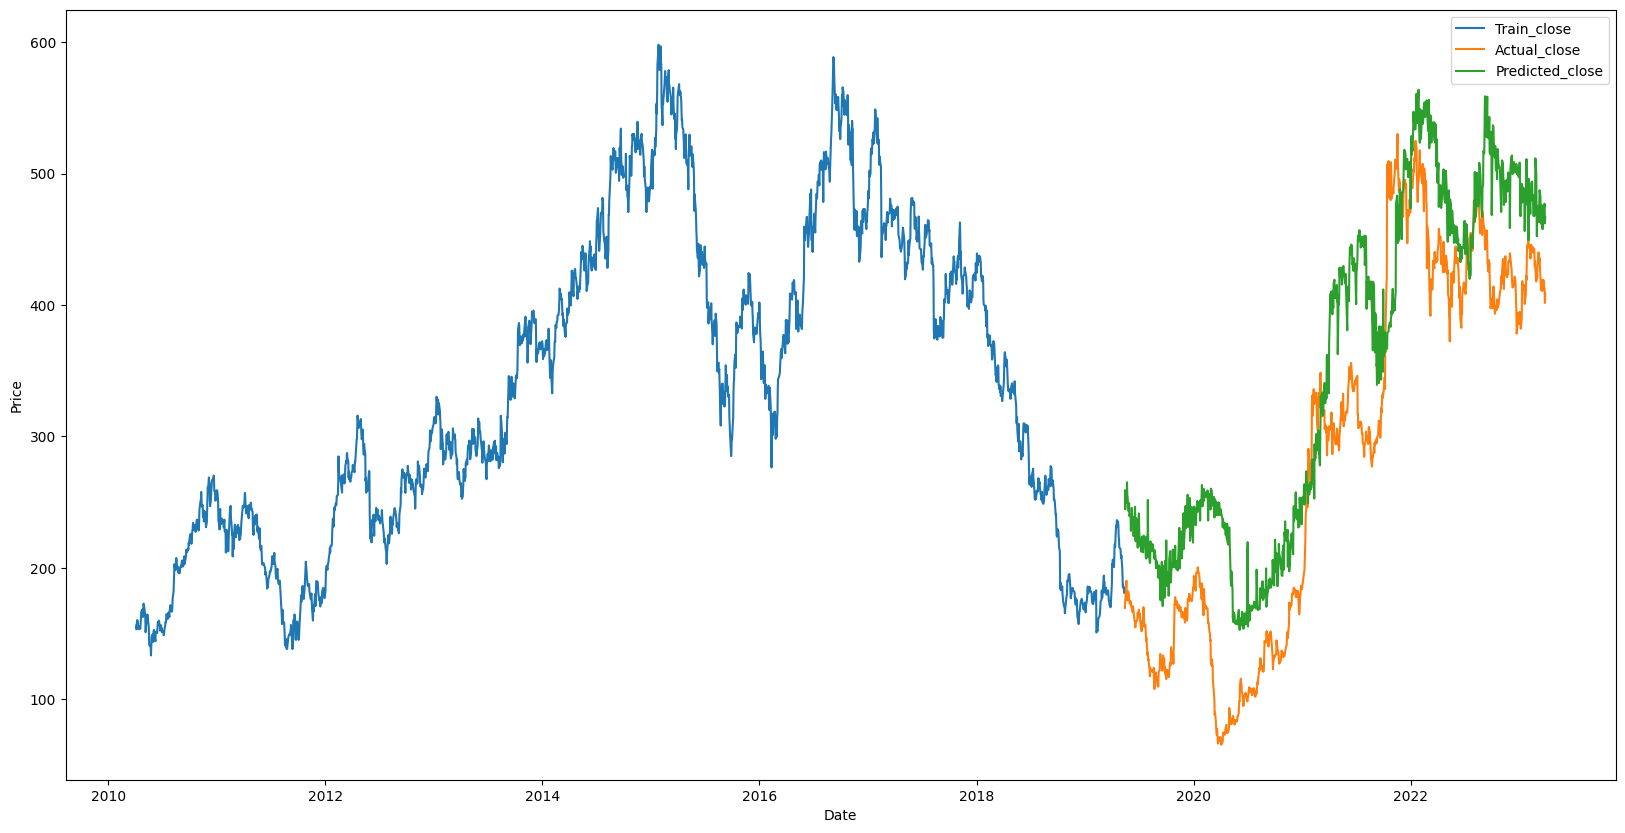

In [33]:
test_data['Predictions'] = 0
test_data['Predictions'] = price_prediction_KNN

test_data.index = new_data[train_size:].index
train_data.index = new_data[:train_size].index

pt.figure(figsize=(20,10))
pt.plot(train_data['Close'])
pt.plot(test_data[['Close', 'Predictions']])
pt.xlabel('Date')
pt.ylabel('Price')
pt.legend(['Train_close', 'Actual_close', 'Predicted_close'])

##Auto-Arima

In [34]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [35]:
df_copy3 = df.copy()
df_copy3 = df_copy3.reset_index()
df_copy3.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3265,2023-03-23,416.000000,422.500000,416.000000,419.149994,419.149994,9817460
3266,2023-03-24,419.000000,420.549988,414.799988,416.500000,416.500000,6877960
3267,2023-03-27,416.000000,418.500000,410.250000,412.049988,412.049988,7433933
3268,2023-03-28,414.149994,414.500000,400.450012,401.600006,401.600006,9553659
3269,2023-03-29,401.600006,410.600006,401.600006,409.200012,409.200012,10478506


In [36]:
train_data, test_data = df_copy3[0:int(len(df)*0.7)], df_copy3[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 72.1365082863202


Text(0, 0.5, 'Price')

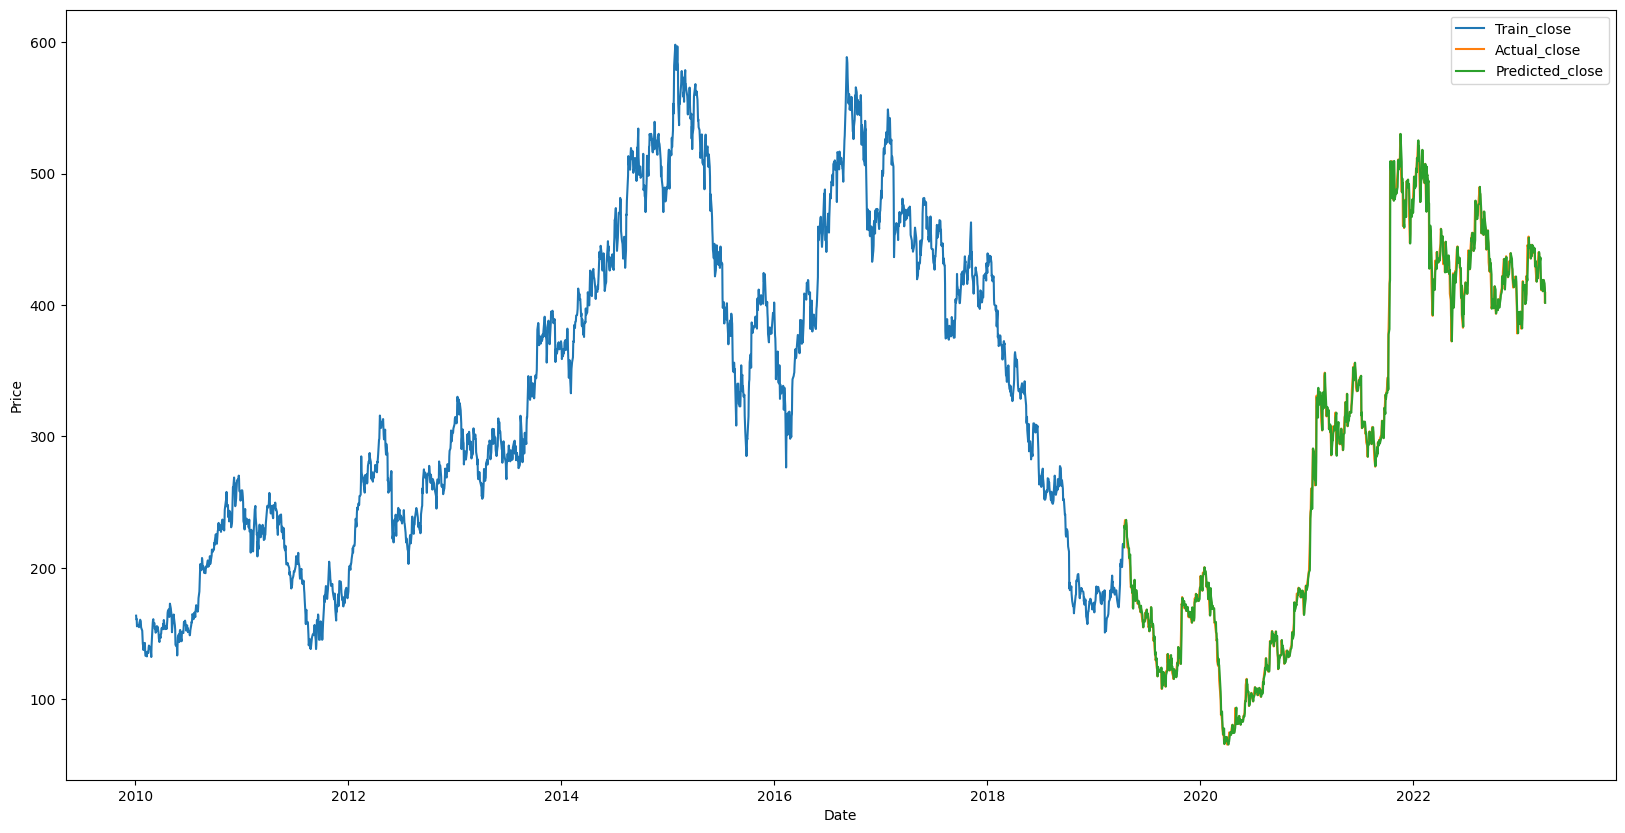

In [37]:
test_data = df_copy3[int(len(df)*0.7):]
pt.figure(figsize=(20,10))
pt.plot(train_data['Date'], train_data['Close'])
pt.plot(test_data['Date'], test_data['Close'])
pt.plot(test_data['Date'],model_predictions)
pt.legend(['Train_close', 'Actual_close', 'Predicted_close'])
pt.xlabel('Date')
pt.ylabel('Price')

##LSTM

The LSTM model is Recurrent Neural Network which considers the data from past and works through a loop. Neural Network induces non-linearity.

In [38]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [39]:
df_copy4 = df.copy()
data = df_copy4.sort_index(ascending=True, axis=0)

In [40]:
data=data.reset_index()
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)
display(new_data)

,Close
Date,
2010-01-04,163.535919
2010-01-05,160.686478
2010-01-06,160.933823
2010-01-07,155.432831
2010-01-08,156.283707
...,...
2023-03-23,419.149994
2023-03-24,416.5
2023-03-27,412.049988


In [41]:
train_size = int(0.7*new_data.shape[0])
test_size = int(0.3*new_data.shape[0])
print(train_size)
print(test_size)

2289
981


In [42]:
dataset = new_data.values
dataset

array([[163.53591918945312],
       [160.6864776611328],
       [160.93382263183594],
       ...,
       [412.04998779296875],
       [401.6000061035156],
       [409.20001220703125]], dtype=object)

In [43]:
train = dataset[0:train_size,:]
test = dataset[train_size:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Training intances are lagged by 100 days here thus providing the hitorical element
x_train, y_train = [], []
for i in range(100,len(train)):
    x_train.append(scaled_data[i-100:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=100,activation = 'tanh', return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=100))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(test) - 100:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(100,inputs.shape[0]):
    X_test.append(inputs[i-100:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

2189/2189 - 144s - loss: 0.0021 - 144s/epoch - 66ms/step
31/31 [==============================] - 3s 56ms/step


In [44]:
rms=np.sqrt(np.mean(np.power((test-closing_price),2)))
rms

20.25530647178693

In [45]:
import math
print("Train data RMSE: ", math.sqrt(mean_squared_error(y_train,model.predict(x_train))))
print("Train data MSE: ", mean_squared_error(y_train,model.predict(x_train)))
print("Test data MAE: ", mean_absolute_error(y_train,model.predict(x_train)))
print("Test data RMSE: ", math.sqrt(mean_squared_error(test, closing_price)))
print("Test data MSE: ", mean_squared_error(test, closing_price))
print("Test data MAE: ", mean_absolute_error(test, closing_price))
print("Train data explained variance regression score:", explained_variance_score(y_train, model.predict(x_train)))
print("Test data explained variance regression score:", explained_variance_score(test, closing_price))
print("Train data R2 score:", r2_score(y_train, model.predict(x_train)))
print("Test data R2 score:", r2_score(test, closing_price))
print("Train data MGD: ", mean_gamma_deviance(y_train, model.predict(x_train)))
print("Test data MGD: ", mean_gamma_deviance(test, closing_price))
print("Train data MPD: ", mean_poisson_deviance(y_train, model.predict(x_train)))
print("Test data MPD: ", mean_poisson_deviance(test, closing_price))

69/69 [==============================] - 4s 60ms/step
Train data RMSE:  0.04042200394398128
69/69 [==============================] - 4s 57ms/step
Train data MSE:  0.0016339384028472384
69/69 [==============================] - 4s 55ms/step
Test data MAE:  0.03233462999922872
Test data RMSE:  20.25530647178693
Test data MSE:  410.2774402660135
Test data MAE:  15.191629991132793
69/69 [==============================] - 5s 67ms/step
Train data explained variance regression score: 0.9842715814296853
Test data explained variance regression score: 0.9861410215256392
69/69 [==============================] - 4s 55ms/step
Train data R2 score: 0.9657137725696049
Test data R2 score: 0.9791179750807177
69/69 [==============================] - 4s 60ms/step
Train data MGD:  0.005186597110601107
Test data MGD:  0.004179897749128666
69/69 [==============================] - 4s 63ms/step
Train data MPD:  0.0026916390365459525
Test data MPD:  1.167962544160131


Text(0, 0.5, 'Price')

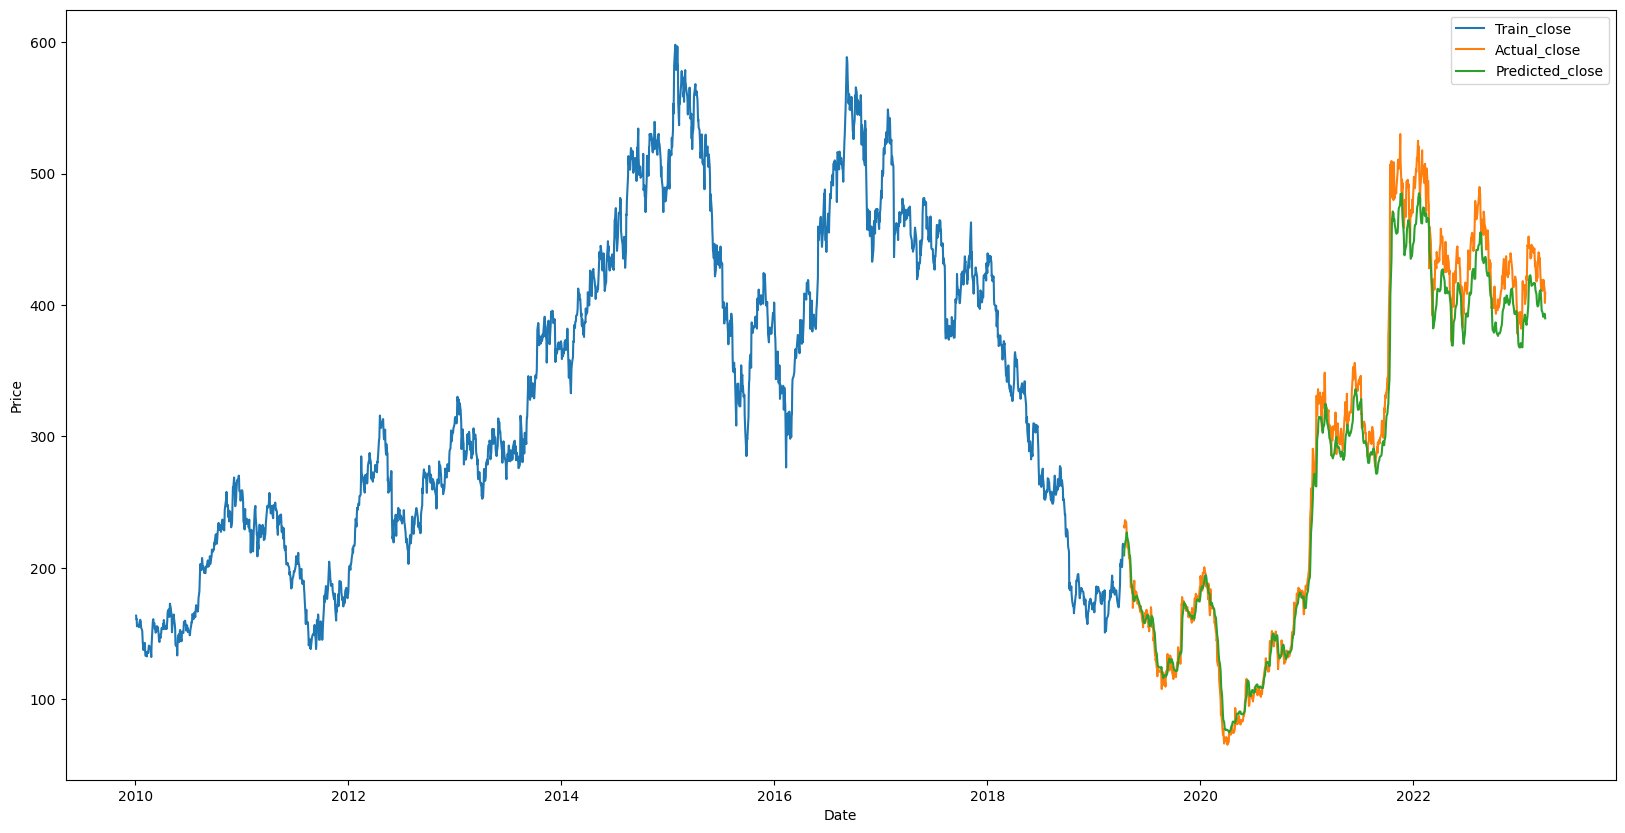

In [46]:
train = new_data[:train_size]
test = new_data[train_size:]
test_copy = test.copy()
test_copy['Prediction'] = closing_price.flatten()


pt.figure(figsize = (20,10))
pt.plot(train['Close'])
pt.plot(test_copy[['Close','Prediction']])
pt.legend(['Train_close', 'Actual_close', 'Predicted_close'])
pt.xlabel('Date')
pt.ylabel('Price')

##GRU

In [47]:
import pandas as pd
import numpy as np
import math
import datetime as dt
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU

from itertools import cycle

# ! pip install plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [48]:
# Import dataset
df_copy5 = df.copy()
df_copy5 = df_copy5.reset_index()
df_copy5.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,156.303482,164.040497,156.184769,163.535919,153.140793,27906448
1,2010-01-05,162.259598,167.147186,153.246277,160.686478,150.472473,23669317
2,2010-01-06,162.200241,162.932388,159.311234,160.933823,150.704086,14990820
3,2010-01-07,161.171280,161.923218,154.344498,155.432831,145.552765,22722030
4,2010-01-08,156.323273,159.251862,155.343781,156.283707,146.349564,16495776


In [50]:
# Checking null value
df_copy5.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [51]:
# Checking na value
df_copy5.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [52]:
df_copy5.dropna(inplace=True)
df_copy5.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [53]:
# Checking Data type of each column
print("Date column data type: ", type(df_copy5['Date'][0]))
print("Open column data type: ", type(df_copy5['Open'][0]))
print("Close column data type: ", type(df_copy5['Close'][0]))
print("High column data type: ", type(df_copy5['High'][0]))
print("Low column data type: ", type(df_copy5['Low'][0]))

Date column data type:  <class 'pandas._libs.tslibs.timestamps.Timestamp'>
Open column data type:  <class 'numpy.float64'>
Close column data type:  <class 'numpy.float64'>
High column data type:  <class 'numpy.float64'>
Low column data type:  <class 'numpy.float64'>


In [54]:
# convert date field from string to Date format and make it index
df_copy5['Date'] = pd.to_datetime(df_copy5.Date)
df_copy5.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,156.303482,164.040497,156.184769,163.535919,153.140793,27906448
1,2010-01-05,162.259598,167.147186,153.246277,160.686478,150.472473,23669317
2,2010-01-06,162.200241,162.932388,159.311234,160.933823,150.704086,14990820
3,2010-01-07,161.171280,161.923218,154.344498,155.432831,145.552765,22722030
4,2010-01-08,156.323273,159.251862,155.343781,156.283707,146.349564,16495776


In [55]:
df_copy5.sort_values(by='Date', inplace=True)
df_copy5.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,156.303482,164.040497,156.184769,163.535919,153.140793,27906448
1,2010-01-05,162.259598,167.147186,153.246277,160.686478,150.472473,23669317
2,2010-01-06,162.200241,162.932388,159.311234,160.933823,150.704086,14990820
3,2010-01-07,161.171280,161.923218,154.344498,155.432831,145.552765,22722030
4,2010-01-08,156.323273,159.251862,155.343781,156.283707,146.349564,16495776


In [56]:
df_copy5.shape

(3270, 7)

In [57]:
print("Starting date: ",df_copy5.iloc[0][0])
print("Ending date: ", df_copy5.iloc[-1][0])
print("Duration: ", df_copy5.iloc[-1][0]-df_copy5.iloc[0][0])

Starting date:  2010-01-04 00:00:00
Ending date:  2023-03-29 00:00:00
Duration:  4832 days 00:00:00


In [58]:
closedf = df_copy5[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (3270, 2)


Text(0, 0.5, 'Price')

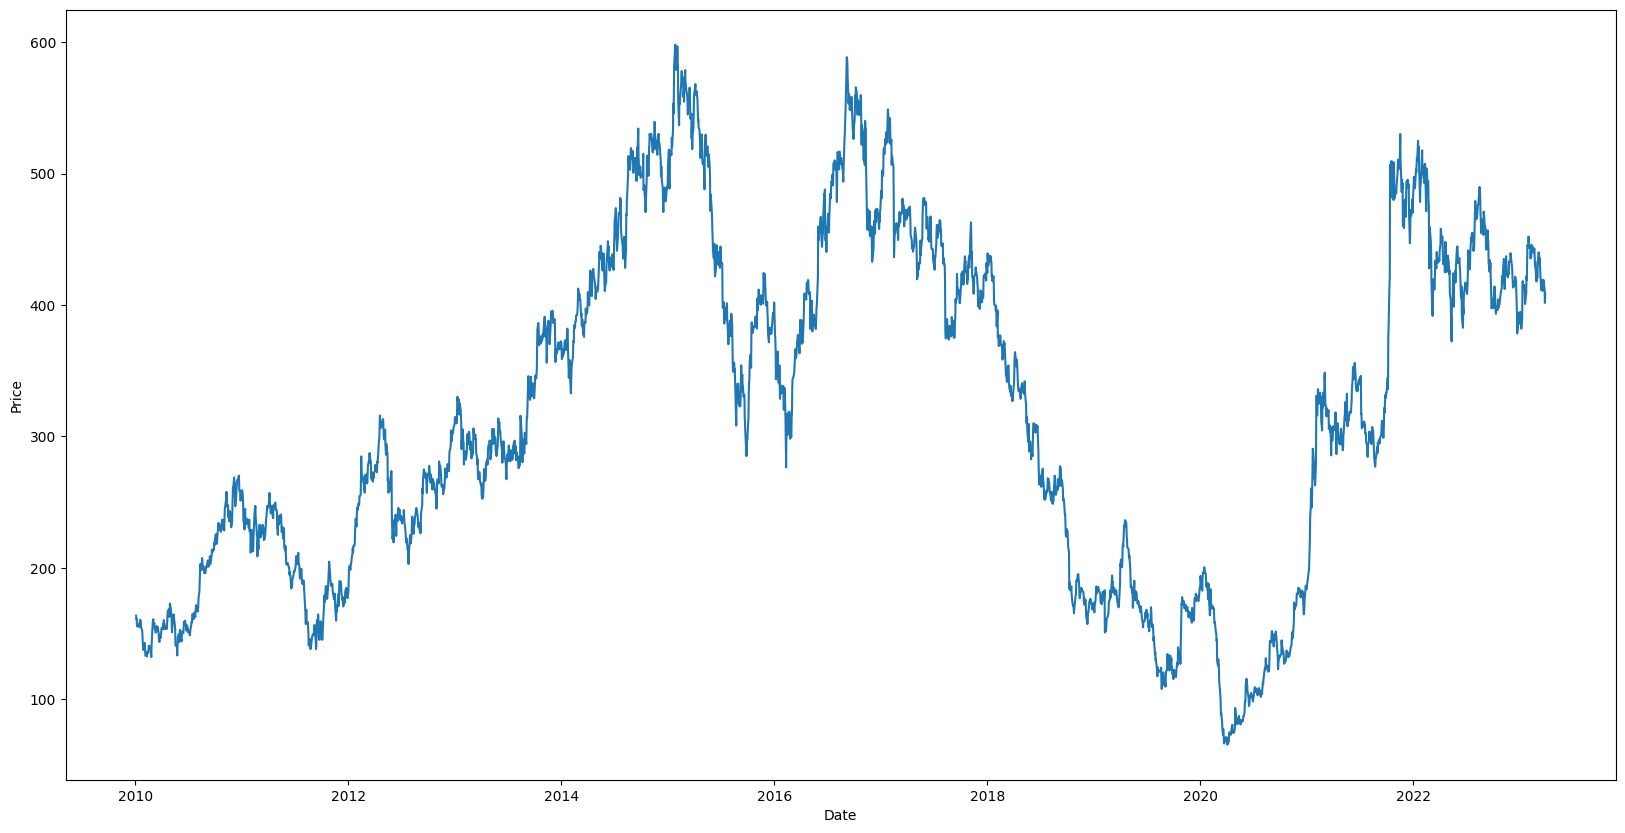

In [59]:
df_copy5['Date'] = pd.to_datetime(df_copy5.Date, format='%Y-%m-%d')
df_copy5.set_index('Date', inplace=True)
 # plotting
pt.figure(figsize=(20,10))
pt.plot(df_copy5['Close'], label='Close Price movement')
pt.xlabel('Date')
pt.ylabel('Price')

In [60]:
close_stock = closedf.copy()
del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(3270, 1)


In [61]:
training_size=int(len(closedf)*0.7)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (2289, 1)
test_data:  (981, 1)


In [62]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [63]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (2273, 15)
y_train:  (2273,)
X_test:  (965, 15)
y_test (965,)


In [64]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (2273, 15, 1)
X_test:  (965, 15, 1)


In [65]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(32,return_sequences=True,input_shape=(time_step,1)))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [66]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 15, 32)            3360      
                                                                 
 gru_1 (GRU)                 (None, 15, 32)            6336      
                                                                 
 gru_2 (GRU)                 (None, 15, 32)            6336      
                                                                 
 gru_3 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 22,401
Trainable params: 22,401
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=5,verbose=1)

Epoch 1/20
455/455 [==============================] - 29s 42ms/step - loss: 0.0051 - val_loss: 0.0015
Epoch 2/20
455/455 [==============================] - 19s 41ms/step - loss: 7.6249e-04 - val_loss: 7.4137e-04
Epoch 3/20
455/455 [==============================] - 18s 39ms/step - loss: 4.9144e-04 - val_loss: 4.5805e-04
Epoch 4/20
455/455 [==============================] - 18s 39ms/step - loss: 5.3449e-04 - val_loss: 6.3513e-04
Epoch 5/20
455/455 [==============================] - 19s 41ms/step - loss: 4.4876e-04 - val_loss: 5.0958e-04
Epoch 6/20
455/455 [==============================] - 18s 39ms/step - loss: 3.7525e-04 - val_loss: 2.8301e-04
Epoch 7/20
455/455 [==============================] - 19s 42ms/step - loss: 3.6177e-04 - val_loss: 3.0395e-04
Epoch 8/20
455/455 [==============================] - 18s 40ms/step - loss: 4.1869e-04 - val_loss: 4.6383e-04
Epoch 9/20
455/455 [==============================] - 18s 39ms/step - loss: 3.4332e-04 - val_loss: 5.5839e-04
Epoch 10/20
455/45

In [68]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

31/31 [==============================] - 0s 12ms/step


((2273, 1), (965, 1))

In [69]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [70]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data RMSE:  11.141117009743327
Train data MSE:  124.12448822479209
Train data MAE:  8.363258385312122
Test data RMSE:  11.418076452087046
Test data MSE:  130.3724698657047
Test data MAE:  8.046816526422846
Train data explained variance regression score: 0.9939640973950716
Test data explained variance regression score: 0.9948552280780177
Train data R2 score: 0.9913242331854587
Test data R2 score: 0.9934396979595601
Train data MGD:  0.0008907580724232741
Test data MGD:  0.0013704865973056333
Train data MPD:  0.3126300060215787
Test data MPD:  0.3652169299376512


In [80]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

Text(0, 0.5, 'Price')

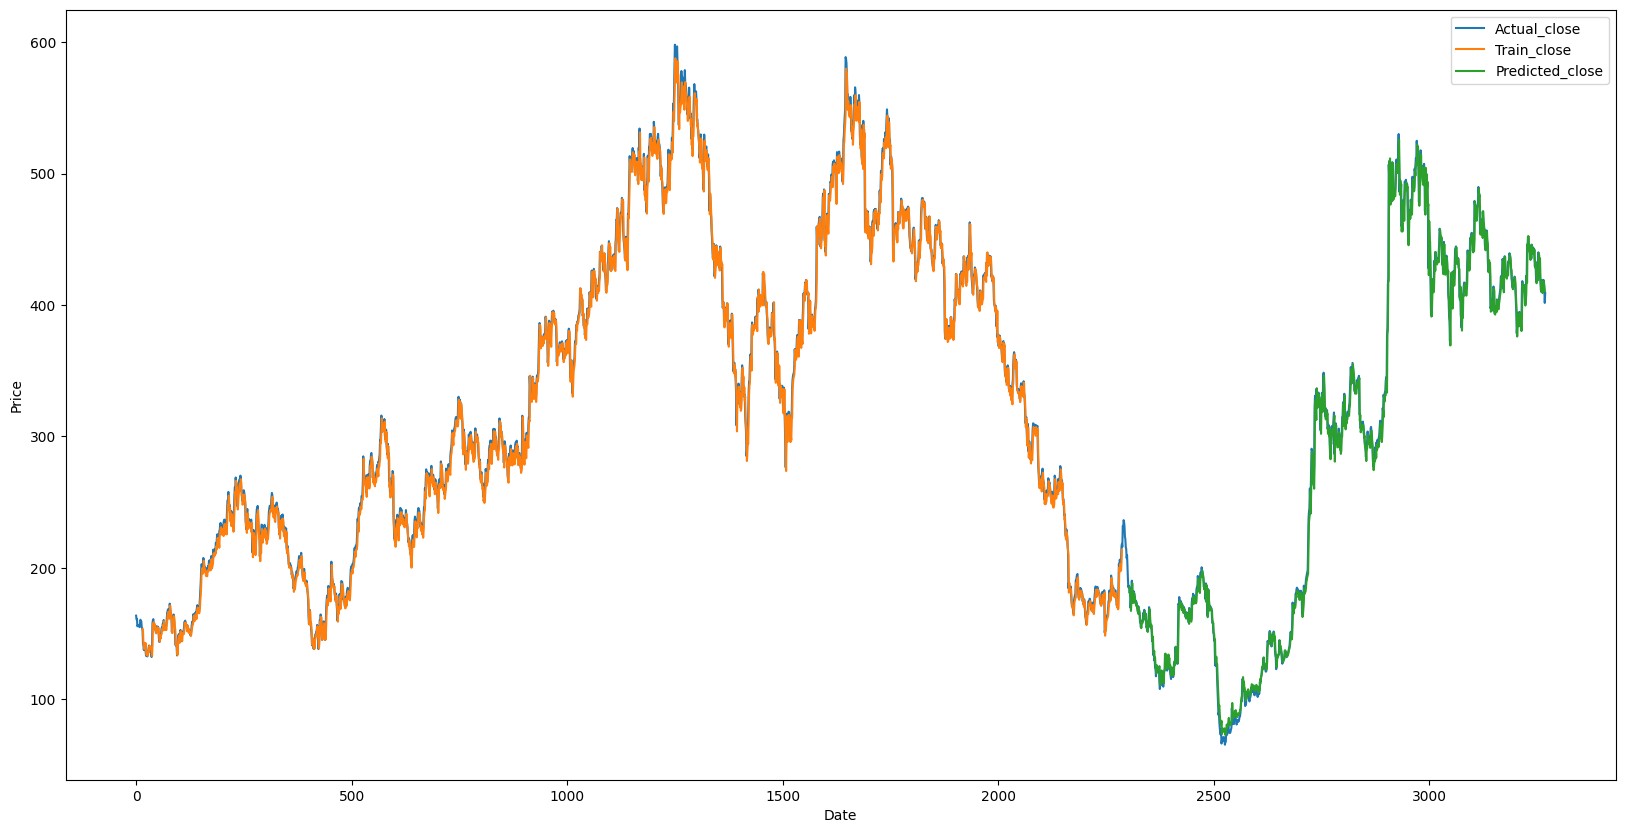

In [79]:
names = cycle(['Original close price','Train predicted close price','Test predicted close price'])
plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})
pt.figure(figsize = (20,10))
pt.plot(plotdf['original_close'])
pt.plot(plotdf['train_predicted_close'])
pt.plot(plotdf['test_predicted_close'])
pt.legend(['Actual_close','Train_close', 'Predicted_close'])
pt.xlabel('Date')
pt.ylabel('Price')

##GRU + Hybrid

In [72]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (2273, 15, 1)
X_test:  (965, 15, 1)


In [73]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 15, 32)            3360      
                                                                 
 gru_1 (GRU)                 (None, 15, 32)            6336      
                                                                 
 gru_2 (GRU)                 (None, 15, 32)            6336      
                                                                 
 gru_3 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 22,401
Trainable params: 22,401
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=5,verbose=1)

Epoch 1/20
455/455 [==============================] - 18s 40ms/step - loss: 3.0947e-04 - val_loss: 3.2912e-04
Epoch 2/20
455/455 [==============================] - 17s 38ms/step - loss: 3.0784e-04 - val_loss: 2.9189e-04
Epoch 3/20
455/455 [==============================] - 19s 41ms/step - loss: 3.4594e-04 - val_loss: 2.6171e-04
Epoch 4/20
455/455 [==============================] - 17s 38ms/step - loss: 3.0280e-04 - val_loss: 2.9425e-04
Epoch 5/20
455/455 [==============================] - 17s 38ms/step - loss: 2.8728e-04 - val_loss: 2.7936e-04
Epoch 6/20
455/455 [==============================] - 23s 51ms/step - loss: 3.0707e-04 - val_loss: 3.1855e-04
Epoch 7/20
455/455 [==============================] - 21s 47ms/step - loss: 3.2341e-04 - val_loss: 3.3774e-04
Epoch 8/20
455/455 [==============================] - 17s 38ms/step - loss: 3.1825e-04 - val_loss: 3.2553e-04
Epoch 9/20
455/455 [==============================] - 28s 63ms/step - loss: 3.0138e-04 - val_loss: 3.1303e-04
Epoch 10/2

In [75]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

31/31 [==============================] - 0s 9ms/step


((2273, 1), (965, 1))

In [76]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [77]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data RMSE:  7.962955790195214
Train data MSE:  63.408664916603485
Train data MAE:  5.86329509233306
Test data RMSE:  8.861784505739111
Test data MSE:  78.53122462615778
Test data MAE:  5.996521857859557
Train data explained variance regression score: 0.9959082371451637
Test data explained variance regression score: 0.9960908705538947
Train data R2 score: 0.9955680075808928
Test data R2 score: 0.996048333258671
Train data MGD:  0.0006314356407955812
Test data MGD:  0.0013616352708329452
Train data MPD:  0.18626122296342146
Test data MPD:  0.2711341048578999


In [81]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)


Text(0, 0.5, 'Price')

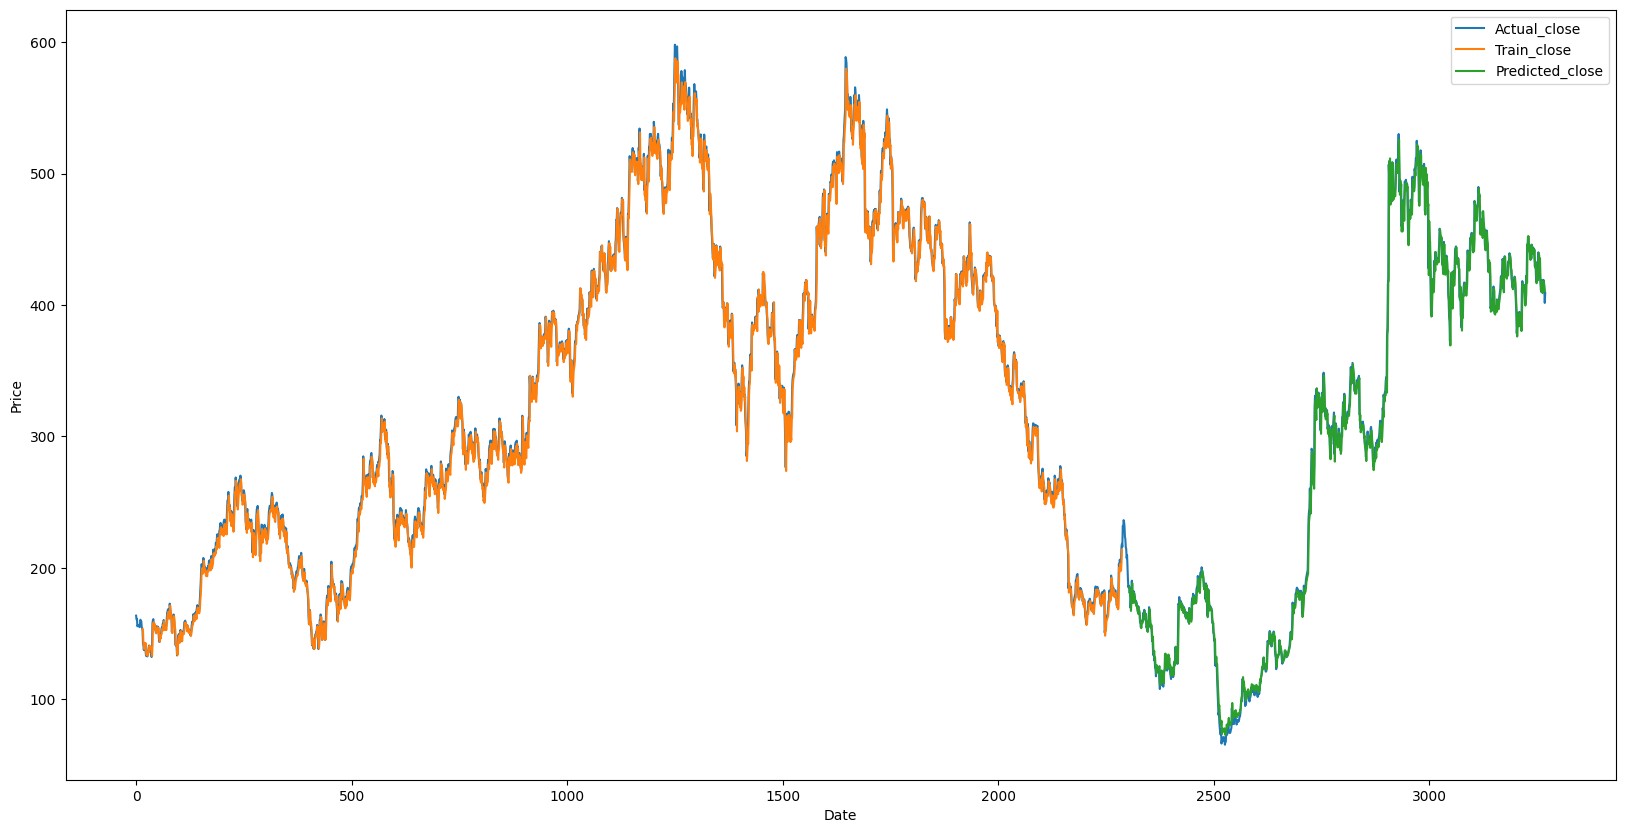

In [82]:
names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

pt.figure(figsize = (20,10))

pt.plot(plotdf['original_close'])
pt.plot(plotdf['train_predicted_close'])
pt.plot(plotdf['test_predicted_close'])
pt.legend(['Actual_close','Train_close', 'Predicted_close'])
pt.xlabel('Date')
pt.ylabel('Price')